# EDA

## Setup

### Loading Custom Modules

In this notebook we will use `etl_pipeline`, created in dqc notebook, but it contains some custom transformers, so I've created module with all dependenties for pipeline. You can install it by running next cell.

In [1]:
%pip install ..\scripts -q
print("Instalation Complitted!")

Note: you may need to restart the kernel to use updated packages.
Instalation Complitted!


### Importing Modules

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

from etl.transformers import * # dependencies for etl pipeline

from pickle import dump, load

### Importing Data

In [3]:
item_categories = pd.read_csv("../data/item_categories.csv")
shops = pd.read_csv("../data/shops.csv")
items = pd.read_csv("../data/items.csv")

sales_train = pd.read_csv("../data/sales_train.csv")
test = pd.read_csv("../data/test.csv", index_col=0)

Also, now we have a DQC-ETL pipeline, so lets use it in order to transform it and make in ready for EDA

In [4]:
etl_pipeline = load(open("../pipelines/etl_pipeline_v1.pkl", "rb"))

In [5]:
sales_train = pd.read_csv("../data/sales_train.csv")
train = etl_pipeline.fit_transform(sales_train)
train

date  date_block_num  item_price  item_cnt_day  \
0       2013-01-02               0      999.00           1.0   
1       2013-01-03               0      899.00           1.0   
2       2013-01-05               0      899.00          -1.0   
3       2013-01-06               0     1709.05           1.0   
4       2013-01-15               0     1099.00           1.0   
...            ...             ...         ...           ...   
2935844 2015-10-10              33      299.00           1.0   
2935845 2015-10-09              33      299.00           1.0   
2935846 2015-10-14              33      349.00           1.0   
2935847 2015-10-22              33      299.00           1.0   
2935848 2015-10-03              33      299.00           1.0   

                      shop_name shop_id  \
0        Ярославль ТЦ "Альтаир"      59   
1           Москва ТРК "Атриум"      25   
2           Москва ТРК "Атриум"      25   
3           Москва ТРК "Атриум"      25   
4           Москва ТРК "Атриум"      25   
...                         ...     ...   
2935844     Москва ТРК "Атриум"      25   
2935845     Москва ТРК "Атриум"      25   
2935846     Москва ТРК "Атриум"      25   
2935847     Москва ТРК "Атриум"      25   
2935848     Москва ТРК "Атриум"      25   

                                                 item_name item_id  \
0                                        ЯВЛЕНИЕ 2012 (BD)   22154   
1                 DEEP PURPLE  The House Of Blue Light  LP    2552   
2                 DEEP PURPLE  The House Of Blue Light  LP    2552   
3                 DEEP PURPLE  Who Do You Think We Are  LP    2554   
4                  DEEP PURPLE 30 Very Best Of 2CD (Фирм.)    2555   
...                                                    ...     ...   
2935844                   V/A Nu Jazz Selection (digipack)    7409   
2935845             V/A The Golden Jazz Collection  1  2CD    7460   
2935846                       V/A The Best Of The 3 Tenors    7459   
2935847  V/A Relax Collection  Planet MP3 (mp3-CD) (jewel)    7440   
2935848             V/A The Golden Jazz Collection  1  2CD    7460   

                          item_category_name item_category_id  
0                             Кино - Blu-Ray               37  
1                             Музыка - Винил               58  
2                             Музыка - Винил               58  
3                             Музыка - Винил               58  
4        Музыка - CD фирменного производства               56  
...                                      ...              ...  
2935844  Музыка - CD локального производства               55  
2935845  Музыка - CD локального производства               55  
2935846  Музыка - CD локального производства               55  
2935847                         Музыка - MP3               57  
2935848  Музыка - CD локального производства               55  

[2935846 rows x 10 columns]

## EDA

It is important to notice, that in our dataset we dont have a target explicitly. In this task we will try to predict _`item_cnt_day`_ for every item in every shop for the next month.

There are many approaches on this task, but as a base solution, we will try to predict _`item_cnt_day`_ for every item in every shop for __the every day__ of next month. So we need to modify test set a bit, but now we will eda the train set, that we alrady have

In [6]:
train

date  date_block_num  item_price  item_cnt_day  \
0       2013-01-02               0      999.00           1.0   
1       2013-01-03               0      899.00           1.0   
2       2013-01-05               0      899.00          -1.0   
3       2013-01-06               0     1709.05           1.0   
4       2013-01-15               0     1099.00           1.0   
...            ...             ...         ...           ...   
2935844 2015-10-10              33      299.00           1.0   
2935845 2015-10-09              33      299.00           1.0   
2935846 2015-10-14              33      349.00           1.0   
2935847 2015-10-22              33      299.00           1.0   
2935848 2015-10-03              33      299.00           1.0   

                      shop_name shop_id  \
0        Ярославль ТЦ "Альтаир"      59   
1           Москва ТРК "Атриум"      25   
2           Москва ТРК "Атриум"      25   
3           Москва ТРК "Атриум"      25   
4           Москва ТРК "Атриум"      25   
...                         ...     ...   
2935844     Москва ТРК "Атриум"      25   
2935845     Москва ТРК "Атриум"      25   
2935846     Москва ТРК "Атриум"      25   
2935847     Москва ТРК "Атриум"      25   
2935848     Москва ТРК "Атриум"      25   

                                                 item_name item_id  \
0                                        ЯВЛЕНИЕ 2012 (BD)   22154   
1                 DEEP PURPLE  The House Of Blue Light  LP    2552   
2                 DEEP PURPLE  The House Of Blue Light  LP    2552   
3                 DEEP PURPLE  Who Do You Think We Are  LP    2554   
4                  DEEP PURPLE 30 Very Best Of 2CD (Фирм.)    2555   
...                                                    ...     ...   
2935844                   V/A Nu Jazz Selection (digipack)    7409   
2935845             V/A The Golden Jazz Collection  1  2CD    7460   
2935846                       V/A The Best Of The 3 Tenors    7459   
2935847  V/A Relax Collection  Planet MP3 (mp3-CD) (jewel)    7440   
2935848             V/A The Golden Jazz Collection  1  2CD    7460   

                          item_category_name item_category_id  
0                             Кино - Blu-Ray               37  
1                             Музыка - Винил               58  
2                             Музыка - Винил               58  
3                             Музыка - Винил               58  
4        Музыка - CD фирменного производства               56  
...                                      ...              ...  
2935844  Музыка - CD локального производства               55  
2935845  Музыка - CD локального производства               55  
2935846  Музыка - CD локального производства               55  
2935847                         Музыка - MP3               57  
2935848  Музыка - CD локального производства               55  

[2935846 rows x 10 columns]

In [73]:
train["date_block_num"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

We have only data for 33 date blocks, that means, that for this task we can asume, that we want to predict sales from November 2015

### Date

In [7]:
train_date_tf = train.drop([ "item_name", "item_id", "item_category_name", "shop_name"], axis="columns")
train_date_tf["day"] = train_date_tf["date"].apply(lambda x : x.day)
train_date_tf["weekday"] = train_date_tf["date"].apply(lambda x : x.weekday())
train_date_tf["month"] = train_date_tf["date"].apply(lambda x : x.month)
train_date_tf["year"] = train_date_tf["date"].apply(lambda x : x.year)

train_date_tf

date  date_block_num  item_price  item_cnt_day shop_id  \
0       2013-01-02               0      999.00           1.0      59   
1       2013-01-03               0      899.00           1.0      25   
2       2013-01-05               0      899.00          -1.0      25   
3       2013-01-06               0     1709.05           1.0      25   
4       2013-01-15               0     1099.00           1.0      25   
...            ...             ...         ...           ...     ...   
2935844 2015-10-10              33      299.00           1.0      25   
2935845 2015-10-09              33      299.00           1.0      25   
2935846 2015-10-14              33      349.00           1.0      25   
2935847 2015-10-22              33      299.00           1.0      25   
2935848 2015-10-03              33      299.00           1.0      25   

        item_category_id  day  weekday  month  year  
0                     37    2        2      1  2013  
1                     58    3        3      1  2013  
2                     58    5        5      1  2013  
3                     58    6        6      1  2013  
4                     56   15        1      1  2013  
...                  ...  ...      ...    ...   ...  
2935844               55   10        5     10  2015  
2935845               55    9        4     10  2015  
2935846               55   14        2     10  2015  
2935847               57   22        3     10  2015  
2935848               55    3        5     10  2015  

[2935846 rows x 10 columns]

In [42]:
px.plot(train_date_tf.loc[:, ["date", "item_cnt_day"]].groupby("date").sum().reset_index(),
       x="date", y="item_cnt_day", kind="line", title="Amount of items sold through whole timeline for every shop")

In [47]:
px.plot(train_date_tf.loc[:, ["weekday", "item_cnt_day"]].groupby("weekday").sum().reset_index(),
        x="weekday", y="item_cnt_day", kind="line", title="Amount of Items sold by weekday by every shop")

In [48]:
px.plot(train_date_tf.loc[:, ["month", "item_cnt_day"]].groupby("month").sum().reset_index(),
        x="month", y="item_cnt_day", kind="line", title="Amount of Items sold by month for every shop")

Basing on these 3 plots, we can already highlight few things:

1. On first plot we can see, that there are few peeks of purchases before a new year. We can explain the increase in sales by the fact that people buy gifts before the new year.
2. Also it is clear rather make purchases in the end of the week than in the begining. We can explain it by the fact, that people have more free time on the weekends and can go to shop to buy something.
3. And on the third plot we can see that there are less purchases in summer than in winter

In next section we will take a look on purchases depend on shop and item category and plot this data with the help of matplotlib subplots

In [53]:
shops_amount = train_date_tf["shop_id"].unique().size
shops_amount

60

In [54]:
sales_by_shops = train_date_tf.loc[:, ["date", "item_cnt_day", "shop_id"]].groupby(["date", "shop_id"]).sum().reset_index()
sales_by_shops

date  shop_id  item_cnt_day
0     2013-01-01        2          24.0
1     2013-01-01        7          89.0
2     2013-01-01        8          50.0
3     2013-01-01       13          31.0
4     2013-01-01       14          66.0
...          ...      ...           ...
47223 2015-10-31       55         137.0
47224 2015-10-31       56          67.0
47225 2015-10-31       57         121.0
47226 2015-10-31       58          82.0
47227 2015-10-31       59          56.0

[47228 rows x 3 columns]

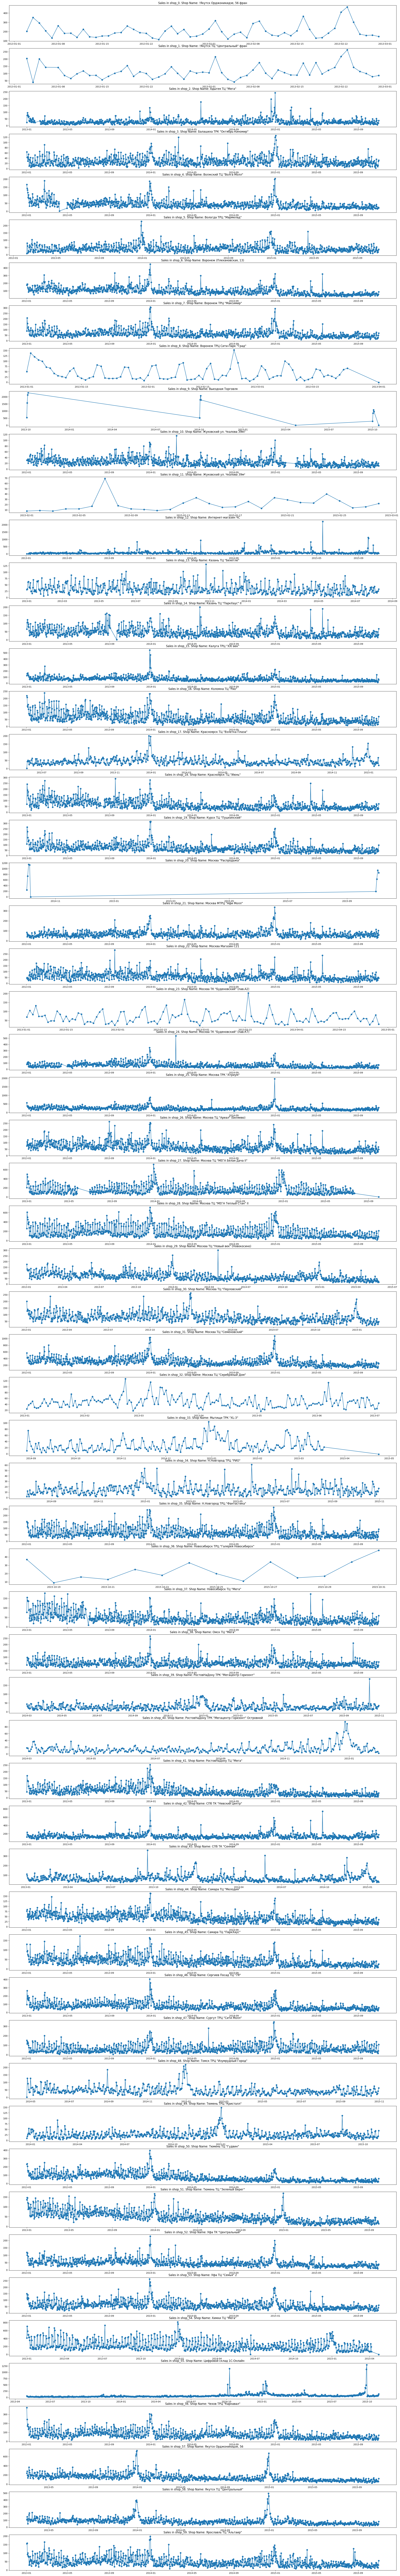

In [69]:
plt.figure(figsize=(30, 200))

for shop_id in range(shops_amount):
    plt.subplot(60, 1, shop_id + 1)
    temp = sales_by_shops[sales_by_shops["shop_id"] == shop_id]
    plt.plot(temp["date"], temp["item_cnt_day"])
    plt.scatter(temp["date"], temp["item_cnt_day"])
    plt.title(f"Sales in shop_{shop_id}. Shop Name: {shops.iloc[shop_id]["shop_name"]}")

Most of shop, that we have on these plots follow main tredns, that we found out, but some of them are different, let's explore these graphs in more detail:

1. Shops number __1__, __2__, __11__ and : We can see that plots for these shops are rare, there are significantly less amount of records for these shops. The reason for it could be that shops __1__, __2__, __11__  are just missnamed shops __57__ and __58__ and __10__. If we compare their names, we will find out that they are same and differ only by a few characters. These characters are special, so they probably just had been encoded incorrectly.


2. Shop number __9__ is also different, there are even less records for this shop. Actually, this is don't even a shop. ID 9 is used to tag _itinerant trading_. And as you can see, this "store" works only few days in october (this object from April and last object are refunds, you can check it by running __*sales_by_shops[sales_by_shops["shop_id"] == 9]*__)

3. Shop number __20__ is also different, and actualy, with this shop we have simmilar situation as with shop number __9__. Shop number __20__ is also not a shop. It stands for sales events, which are also occure in October


4. Shop number __23__: This is a shop, which is located in the same shoping mall with shop number 24. Also it is important to notice that we only have information from 2013.01 to 2013.05, so theoreticaly(!), we can assume, that this shop is closed now.

5. For shop __25__ there are two intervals, for which we have no info about purchases, one in the middle of 2013 and one in the end of timeline we have for this data. That means, that probably this shop is still opened, but we have not fresh data about it

6. For shop number __32__ we also don't have a fresh information about sales. The information we have is distributed from 2013.01 to 2013.07 so here we also can theoreticly assume that this shop is closed now.

7. Shop number __33__ is relatively new, that is the reason, why we don't have a lot information about it. Also it is important to notice that for it we also don't have any relatively fresh info, because last transaction in this shop we know about was in April 2015

8. Shop number __36__ is completely new, we have only info about it last 2 weeks of work

9. For shop __55__ we can notice that its plot differs a lot from other shops. Because (again) it is not actually a shop, it is a digital warehouse. So we can notice that amount of goods sold per day is preatty uniform, except of New Year and October sales